In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [4]:
#rewards
rewards = np.array([[-1,0,0,10],
                  [-1,0,0,10],
                   [-1,0,0,10],
                   [-1,0,0,0]
                   ])

#transition
transitions = np.array([
    [[0.5, 0.5,0,0], [0.5, 0,0.5,0], [0, 0.5,0,0.5], [0, 0,1,0]],
    [[0, 1,0,0], [1, 0, 0 , 0], [0, 0 , 0.5, 0.5], [0,0,1,0]],
    [[0, 0, 0.5, 0.5], [0, 0.5,0, 0.5], [0, 0.5,0, 0.5], [0,0,1,0]],
    [[0,0,0,1], [0, 0, 0.5, 0.5], [0, 0.5, 0, 0.5], [0.5, 0.5, 0, 0]],
])

In [12]:
#Q learning algorithm
def q_learning(transitions, rewards, gamma, alpha, epsilon, n_episodes):
    n_states, n_actions, _ = transitions.shape
    q_table = np.zeros((n_states, n_actions))
    
    total_rewards = []
    for episode in range(n_episodes):
        state = 0
        done = False
        total_reward = 0
        while not done:
            if np.random.rand()<epsilon:
                action = np.random.choice(n_actions)
            else:
                action = np.argmax(q_table[state])
            new_state = np.random.choice(np.arange(n_states), p=transitions[state, action]/np.sum(transitions[state, action]))
            reward = rewards[state, action]
            q_table[state, action] += alpha * (reward + gamma * np.max(q_table[new_state]) - q_table[state, action])
            state = new_state
            total_reward += reward
            if state==n_states-1:
                done = True
        total_rewards.append(total_reward)
    plt.plot(total_rewards)
    plt.xlabel('Episodes')
    plt.ylabel('Total Reward')
    plt.show()
    
    return q_table

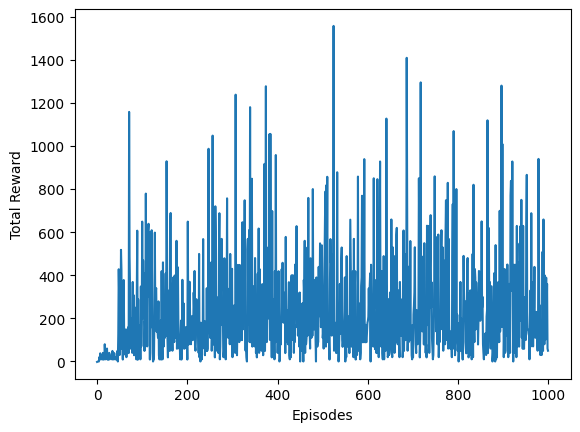

Converged Q Value [[ 88.99999916  90.          64.98436257 100.        ]
 [ 88.99745974  90.          85.10184024 100.        ]
 [ 81.08423072   4.26613886  52.25375649 100.        ]
 [  0.           0.           0.           0.        ]]


In [13]:
gamma = 0.9
alpha = 0.5
epsilon = 0.1
n_episodes = 1000
q_table = q_learning(transitions, rewards, gamma, alpha, epsilon, n_episodes)


#Print
print("Converged Q Value", q_table)